## Import Packages

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import warnings
warnings.filterwarnings("ignore")

## Read File

In [2]:
ingredient_df = pd.read_csv("ingredient.csv")

In [3]:
ingredient_df.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [4]:
ingredient_df.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [5]:
sum_of_each_row = ingredient_df.sum(axis=1)
sum_of_each_row

0      101.54735
1      101.48125
2      101.54300
3      101.28768
4      101.32813
         ...    
209    101.53152
210    101.43848
211    101.44784
212    101.39841
213    101.37321
Length: 214, dtype: float64

In [6]:
sum_of_each_row.describe()

count    214.000000
mean     101.392664
std        0.122704
min      100.536430
25%      101.326570
50%      101.407095
75%      101.480658
max      101.621520
dtype: float64

* The sum of each row are close to 100, suspect that they are in percentage.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

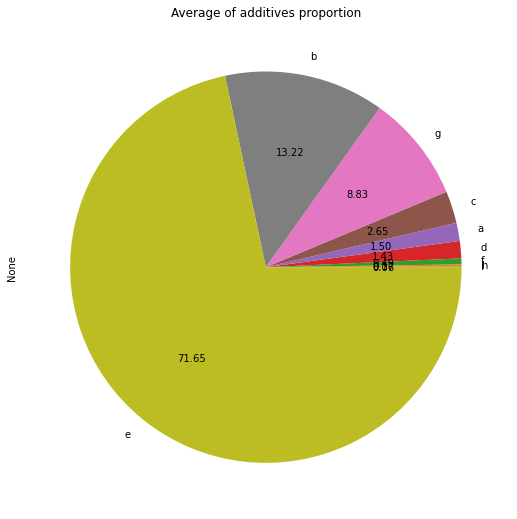

In [8]:
ingredient_df.mean().sort_values().plot.pie(figsize=(10,9), 
                                         title="Average of additives proportion", 
                                         autopct='%.2f')
plt.show()

* Additives e has highest proportion, whereas h has the least proportion

In [9]:
cat_col = "additive"
num_col = "zero_count_proportion"

In [10]:
# For each additive, number of those having 0 divide total rows
temp = ((ingredient_df == 0).sum() / ingredient_df.shape[0]).reset_index()
temp.columns = [cat_col, num_col]
temp

,additive,zero_count_proportion
0,a,0.000000
1,b,0.000000
2,c,0.196262
3,d,0.000000
4,e,0.000000
5,f,0.140187
6,g,0.000000
7,h,0.822430
8,i,0.672897


In [11]:
import seaborn as sns

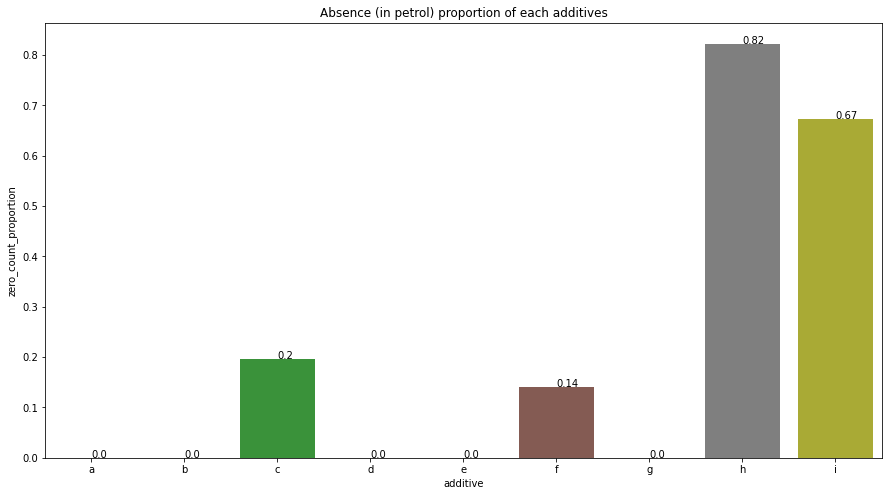

In [12]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x=temp[cat_col].astype(str), y=temp[num_col], ax=ax)
for idx, value in enumerate(temp[num_col]):
    display_value = round(value, 2)
    plt.text(idx, value, display_value) 
plt.title("Absence (in petrol) proportion of each additives")
plt.show()

* Every formulation must contain a, b, d, e, g.
* Among those having "absence":
* 82% (highest) don't have h in the formulation.
* 14% (lowest) don't have f in the formulation.

In [13]:
ingredient_df.shape

(214, 9)

In [14]:
ingredient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


In [15]:
ingredient_df.dtypes

a    float64
b    float64
c    float64
d    float64
e    float64
f    float64
g    float64
h    float64
i    float64
dtype: object

In [16]:
ingredient_df.isnull().any()

a    False
b    False
c    False
d    False
e    False
f    False
g    False
h    False
i    False
dtype: bool

* Summary:
* All column data using same datatypes which is float64
* Number of rows/index = 214, number of column = 9
* No missing or null data inside the dataset

In [18]:
num_vars = [var for var in ingredient_df.columns if ingredient_df[var].dtypes != 'O']
#dtypes 'O' means mix of letter and number

In [19]:
num_vars

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

In [20]:
print('Number of numerical variables: ', len(num_vars))
ingredient_df[num_vars].head()

Number of numerical variables:  9


,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [21]:
def ingredient_df_mean_median(column):
    print(f"{round(column.mean(),2)}\t\t{round(column.median(),2)}")
          
print("Mean\t\tMedian")
for var in num_vars:
    ingredient_df_mean_median(ingredient_df[var])

Mean		Median
1.52		1.52
13.41		13.3
2.68		3.48
1.44		1.36
72.65		72.79
0.5		0.56
8.96		8.6
0.18		0.0
0.06		0.0


In [22]:
def ingredient_df_var_std(column):
    print(f"{round(column.var(),2)}\t\t{round(column.std(),2)}")
          
print("Variance\tStandard Deviation")
for var in num_vars:
    ingredient_df_var_std(ingredient_df[var])

Variance	Standard Deviation
0.0		0.0
0.67		0.82
2.08		1.44
0.25		0.5
0.6		0.77
0.43		0.65
2.03		1.42
0.25		0.5
0.01		0.1


* Summary:
* mean and median of each column difference less than 1.0, means closely to median 
* variance and standard deviation of each column difference less than 1.0 except column c and g 

In [24]:
#  list of discrete variables - my assumption is that a discrete column has less than 20 unique values
discrete_vars = [var for var in num_vars if len(ingredient_df[var].unique())<30]
print('Number of discrete variables: ',len(discrete_vars))

Number of discrete variables:  0


In [25]:
import numpy as np

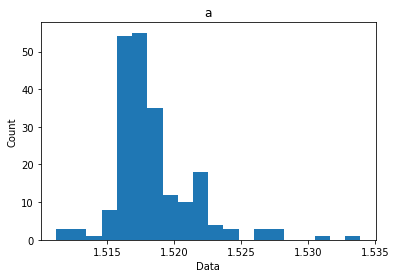

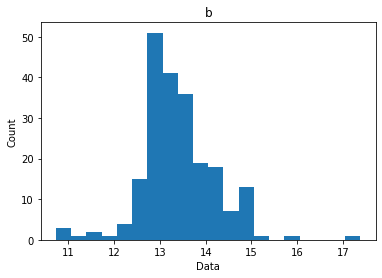

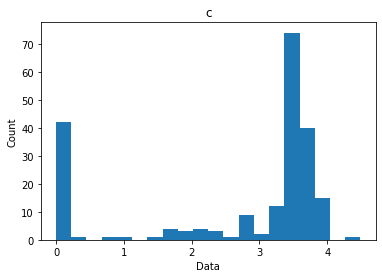

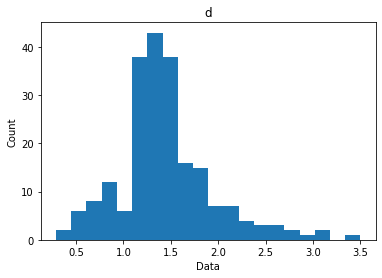

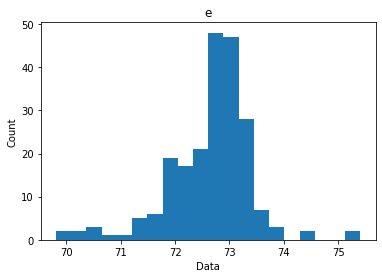

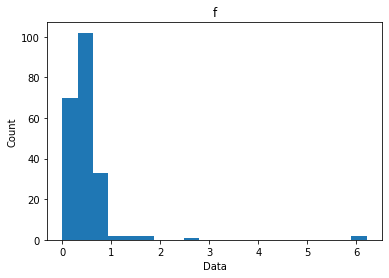

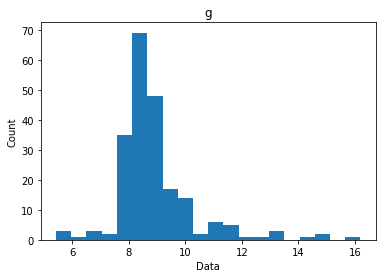

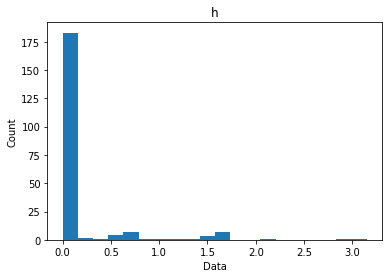

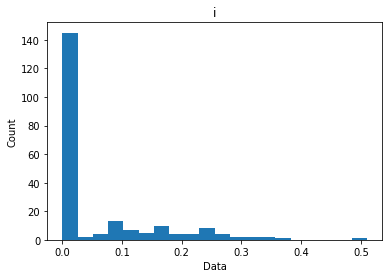

In [26]:
#Analyse the distribution
def column_hist(data,var):
    data=data.copy()
    plt.hist(data,bins=20)
    plt.ylabel('Count')
    plt.xlabel('Data')
    plt.title(var)
    plt.show()
    
for var in num_vars:
    column_hist(ingredient_df[var],var)

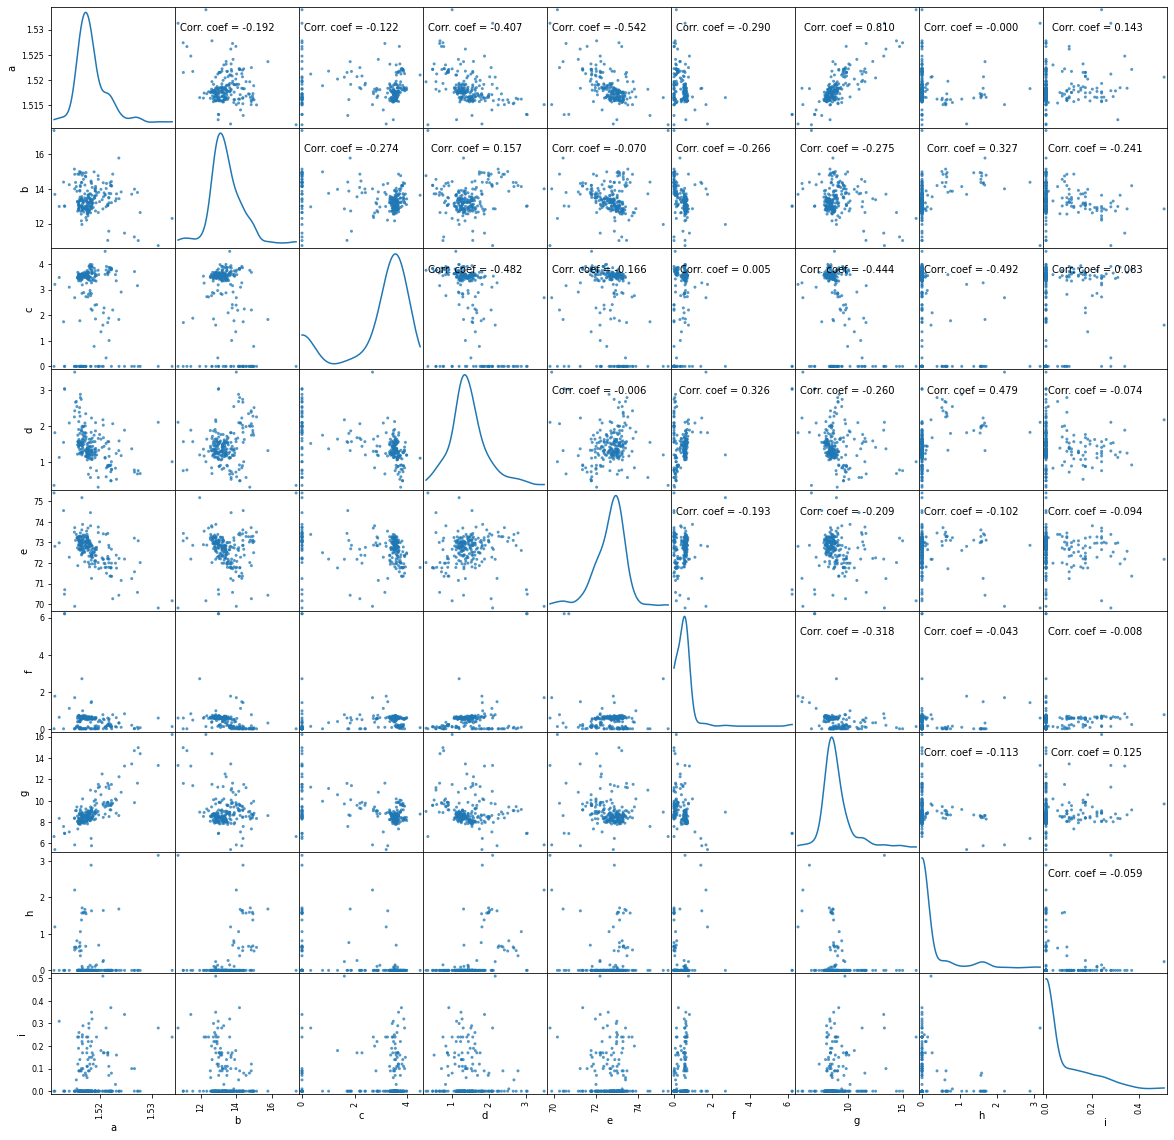

In [27]:
ax=pd.plotting.scatter_matrix(ingredient_df, alpha=0.75, diagonal='kde', figsize=[20,20])
corrs = ingredient_df.corr().values
for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.8), xycoords='axes fraction', ha='right', va='baseline')
plt.show()        

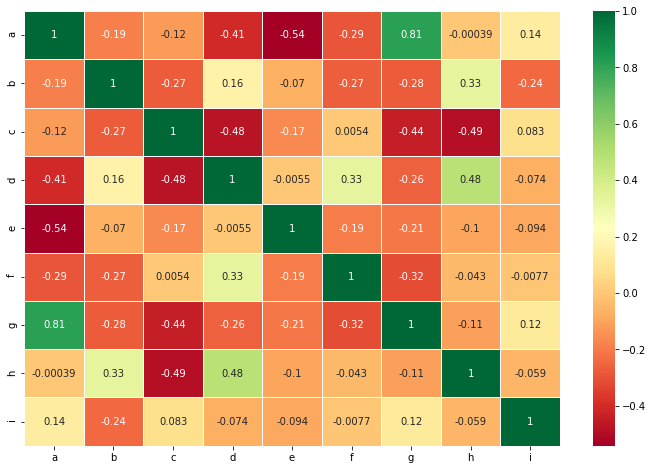

In [28]:
sns.heatmap(ingredient_df.corr(),annot=True,cmap='RdYlGn',linewidths=1)
figure=plt.gcf()
figure.set_size_inches(12,8)
plt.show()

* Summary:
* Based on the above heatmap, we can see that the column a & g are highly correlated (positive correlation as close to 1)
* All the columns distributions are normally distributed except for column f, h, i.
* a & g are highly positively corelated and e & a are highly negatively corelated.
* The pairs (b,h), (d, h) and (d, f) have moderate positive correlations as well.
* A lot of additive pairs are having moderate negative correlations, such as (a, d), (a, e), (c, d), (c, g), (c, h).

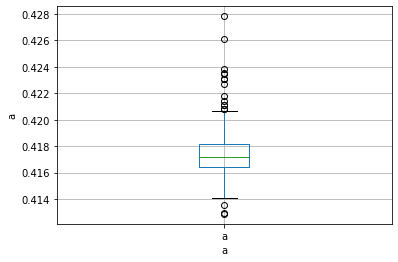

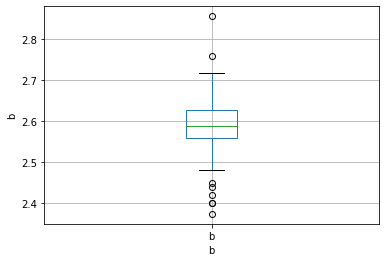

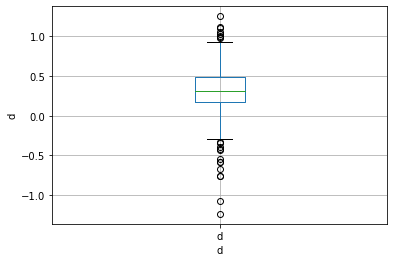

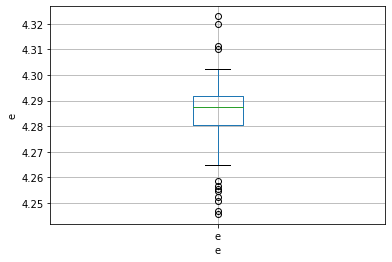

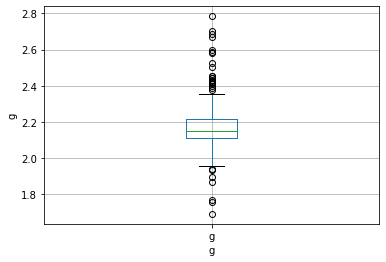

In [30]:
#Use boxplots to find the outliers in the continuous variables 
def column_box(data,var):
    data=data.copy()
    if 0 in data[var].unique():
        pass
    else:
        data[var] = np.log(data[var])
        data.boxplot(column=var)
        plt.ylabel(var)
        plt.xlabel(var)
        plt.show()
    
for var in num_vars:
    column_box(ingredient_df,var)
    

## PCA Dimension Reduction

## Standardizing the Values to Standard Normal

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
segment_std = scaler.fit_transform(ingredient_df)

In [34]:
np.mean(segment_std), np.var(segment_std)

(-2.9366148373055025e-15, 1.0)

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA()
pca.fit(segment_std)

PCA()

In [37]:
# How much variance explained by each of the nine components
pca.explained_variance_ratio_

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

Text(0, 0.5, 'Cumulative Explained Variance')

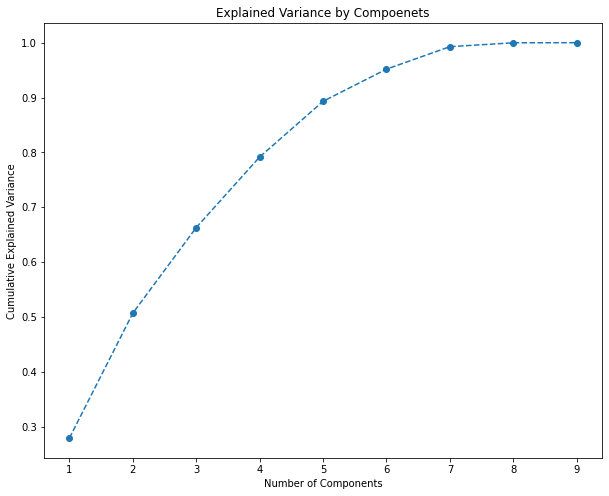

In [38]:
plt.figure(figsize = (10,8))
plt.plot(range(1,10), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle = '--')
plt.title('Explained Variance by Compoenets')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

We choose 4 components, as the cumulative explained variance is around 80%.

In [39]:
pca = PCA(n_components = 4)

In [40]:
#Fit the model
pca.fit(segment_std)

PCA(n_components=4)

In [41]:
scores_pca = pca.transform(segment_std)

## K-means

In [42]:
from sklearn.cluster import KMeans

* We run the algorithm with a different number of clusters.
* Then, determine the Within Cluster Sum of Squares or WCSS for each solution.
* Based on the values of the WCSS and an approach known as the Elbow method, we make a decision about how many clusters we’d like  to keep.

In [43]:
# We fit K means using the transformed data from PCA
wcss = []
for i in range(1,21):
    kmeans_pca =  KMeans(n_clusters = i, init = 'k-means++', random_state = 923)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

Text(0, 0.5, 'WCSS')

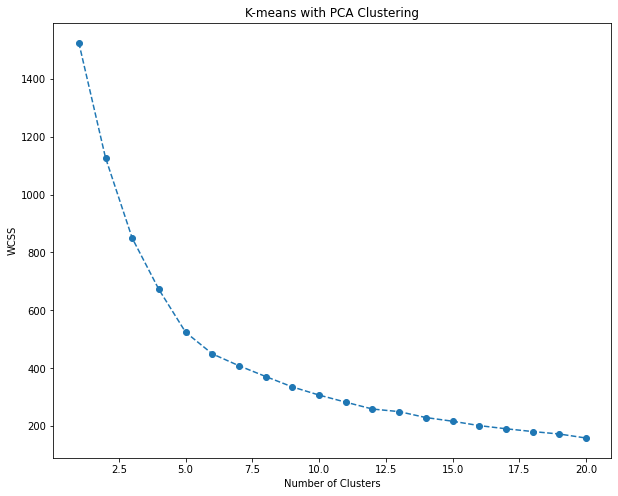

In [44]:
#Plot the WCSS against the number of components on the graph
plt.figure(figsize = (10,8))
plt.plot(range(1,21), wcss, marker='o', linestyle = '--')
plt.title('K-means with PCA Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

* Based on the graph, the kink in the WCSS graph appeared at the 5 clusters mark. We will keel a five-clusters solution.

In [45]:
kmeans_pca =  KMeans(n_clusters = 5, init = 'k-means++', random_state = 923)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=5, random_state=923)

## Analysing Result of PCA and K-means Clustering

* Create a new data frame to add in the values of the separate components to the ingredient data set.
* Label them Component 1, 2, 3 and 4. We also append the kmeans_pca labels to the new data frame.

In [46]:
# Create new data frame with original dataset, PCA Scores and assigmed clusters.
segment_pca_kmeans = pd.concat([ingredient_df.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
segment_pca_kmeans.columns.values[-4:] = ['Component 1','Component 2','Component 3','Component 4']

#Add k-means clustering labels
segment_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [47]:
segment_pca_kmeans.head()

,a,b,c,d,e,f,g,h,i,Component 1,Component 2,Component 3,Component 4,Segment K-means PCA
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,-0.308817,-0.763162,0.330161,-0.172195,0
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,3.640213,6.193445,4.916614,-0.056913,2
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,2.251955,0.027974,-0.326257,0.935988,3
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,-0.115094,-1.052939,-0.038677,-0.576944,0
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,-0.002301,-1.024473,-0.197132,0.792314,0


## Visualize Clusters by Components

In [48]:
from itertools import combinations
components = ['Component 1','Component 2','Component 3','Component 4']

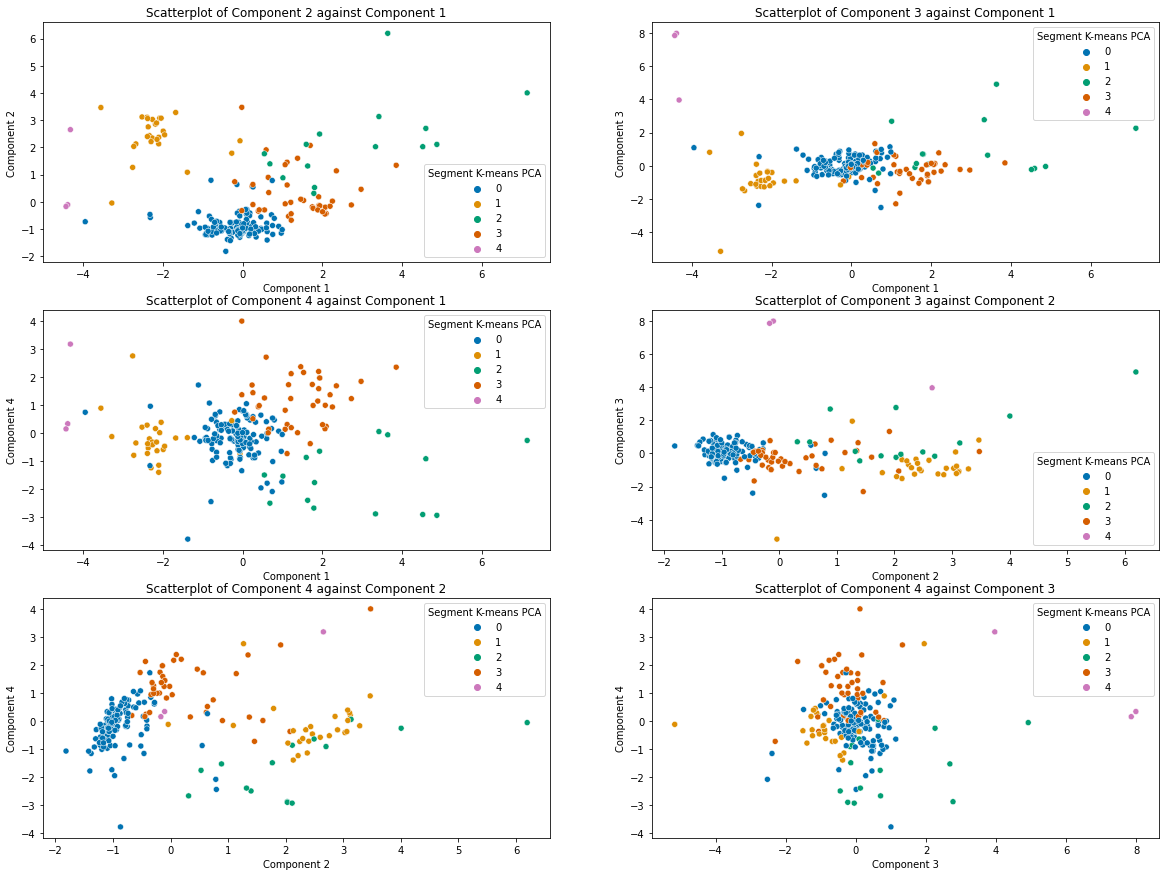

In [49]:
# Plot data by PCA components
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
axes = ax.ravel()

for ax, (col1, col2) in zip(axes, combinations(components, 2)):
    sns.scatterplot(x=segment_pca_kmeans[col1], 
                    y=segment_pca_kmeans[col2], 
                    hue=segment_pca_kmeans['Segment K-means PCA'], 
                    ax=ax,
                    palette='colorblind')
    ax.set_title(f"Scatterplot of {col2} against {col1}")
    
plt.show()

* From the scatterplots, the graph of Components 1 and 2 shows the best segmentation of the five clusters compared to other combination of components.

In [50]:
Segment_PCA = segment_pca_kmeans['Segment K-means PCA'].value_counts()
Segment_PCA_prop = Segment_PCA/Segment_PCA.sum()
print(Segment_PCA_prop)

0    0.598131
3    0.191589
1    0.126168
2    0.070093
4    0.014019
Name: Segment K-means PCA, dtype: float64


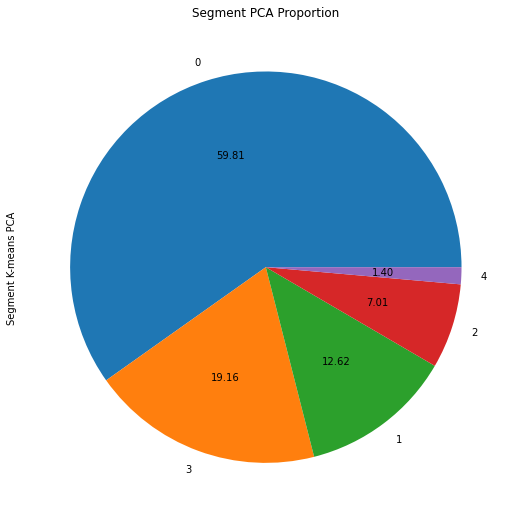

In [51]:
Segment_PCA_prop.plot.pie(figsize=(10,9), 
                          title="Segment PCA Proportion", 
                          autopct='%.2f')
plt.show()

The data segmented into 5 distinct clusters. Most of the data (59.81%) in cluster 0, and least data (1.40%) being segmented in cluster 4.